In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Experiment import Experiment

In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-d

In [2]:
experiment = Experiment()
experiment.simulate()

0.1691067564122556
0.772229274316514
----------
[0.         0.71717172]
0.10047907245959731
0.2551630273505239
----------
[0.09090909 0.        ]
0.9784984626026376
0.7766775808541121
----------
[0.98795181 0.94117647]
0.5835165718782679
0.2128629602163744
----------
[0.65656566 0.        ]
0.6736163461913661
0.37759954454269673
----------
[0.71717172 0.        ]
0.5279028007180248
0.09675607426533672
----------
[0.57575758 0.        ]
0.25919131700498443
0.9187781370826992
----------
[0.         0.91919192]
0.4873584972170927
0.2541710878963629
----------
[0.48484848 0.        ]
0.14224143376401932
0.27715387623658383
----------
[0.09090909 0.        ]
0.5287439904038891
0.28945735279058216
----------
[0.46464646 0.        ]
0.1294427607552633
0.9394036472372401
----------
[0.08080808 0.        ]
0.3769794457992959
0.43253489629938746
----------
[0.33333333 0.        ]
0.8712494336200903
0.2902082300381925
----------
[0.89795918 0.5       ]
0.5480975195623718
0.6010568534140912
------

In [7]:
mean_regret

array([0.91885076, 0.91885076, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073

In [3]:
cum_sum = np.cumsum(experiment.regrets, axis=1)
mean_regret = np.mean(cum_sum, axis=0)

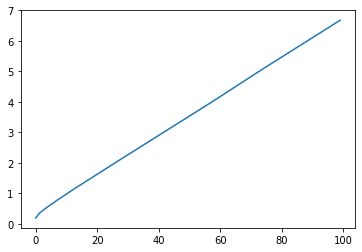

In [4]:
plt.figure()
plt.plot(mean_regret)
plt.show()